In [60]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import IRIS
iris_data = gpd.read_file("../data/IRIS_census_final.gpkg").to_crs(epsg=2154)

# import stations
stations_data = gpd.read_file("../data/transit_final.gpkg").to_crs(epsg=2154)

### Spatial Aggregations for Choropleths

In [5]:
columns_tosum = ['population', 'station_count']
columns_tomean = [ 'dist_to_station_m',
 'walk_time_min',
 'time_min', 'median_net_income',
 'median_disposable_income',
 'unemployment_rate',
 'employed_rate',
 'studying_rate',
 'retired_rate',
 'work_local',
 'work_diffcommune_samearr',
 'work_diffcommune_samedept',
 'work_diffcommune_diffdept_sameregion',
 'work_diffregion',
 'work_diffcountry_',
 'commute_notransport',
 'commute_walk',
 'commute_bicycle',
 'commute_motorcycle',
 'commute_vehicle',
 'commute_publictransport']

In [6]:
# define aggregation dictionary
agg_dict = {col: "sum" for col in columns_tosum}
agg_dict.update({col: "mean" for col in columns_tomean})

In [10]:
# reusable aggregation loop
levels = ["INSEE_COM_ID", "INSEE_ARR_ID", "INSEE_DEP_ID"]
aggregated_gdfs = {}

for level in levels:
    aggregated_gdfs[level] = (iris_data.dissolve(by=level, aggfunc=agg_dict).reset_index())

In [15]:
# save dataframe for each admin level
commune_gdf = aggregated_gdfs["INSEE_COM_ID"]
arrondissement_gdf = aggregated_gdfs["INSEE_ARR_ID"]
department_gdf = aggregated_gdfs["INSEE_DEP_ID"]

In [42]:
# upload geometry for future choropleths
geo_communes = gpd.read_file("../data/boundaries/individual_layers/Communes_iledefrance_with_parisarrs.geojson")
geo_arrondissements = gpd.read_file("../data/boundaries/individual_layers/Arrondissements_iledefrance.geojson")
geo_departments = gpd.read_file("../data/boundaries/individual_layers/Departements_iledefrance.geojson")

### Select transit deserts

In [23]:
iris_data[["walk_time_min", "time_min"]].describe()

,walk_time_min,time_min
count,5413.000000,5413.000000
mean,21.475828,46.786071
std,33.618046,29.329160
min,0.214412,1.000000
25%,3.998905,26.000000
50%,9.141154,39.000000
75%,21.165297,58.000000
max,280.569167,181.000000


In [32]:
# Find worst 10% travel time or walk time
walk_threshold = iris_data["walk_time_min"].quantile(0.75)
travel_threshold = iris_data["time_min"].quantile(0.75)

transit_time_deserts = iris_data[(iris_data["time_min"] >= travel_threshold)]
transit_accessibility_deserts = iris_data[(iris_data["walk_time_min"] >= walk_threshold)]
transit_deserts = iris_data[(iris_data["walk_time_min"] > walk_threshold) & (iris_data["time_min"] > travel_threshold)]

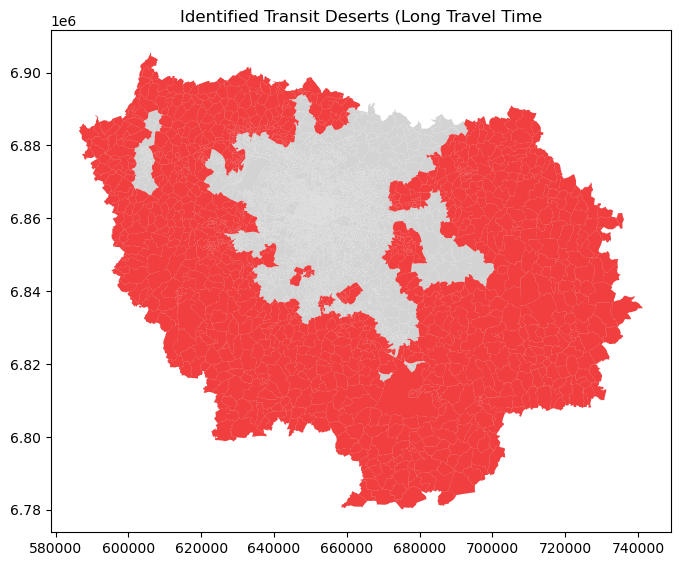

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iris_data.plot(ax=ax, color="lightgray", linewidth=0)
transit_time_deserts.plot(ax=ax, color="red", alpha=0.7)
plt.title("Identified Transit Deserts (Long Travel Time")
plt.show()

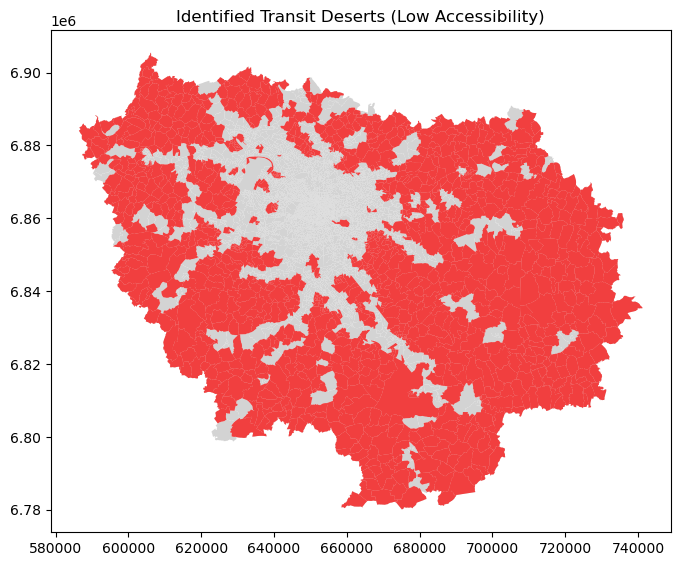

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iris_data.plot(ax=ax, color="lightgray", linewidth=0)
transit_accessibility_deserts.plot(ax=ax, color="red", alpha=0.7)
plt.title("Identified Transit Deserts (Low Accessibility)")
plt.show()

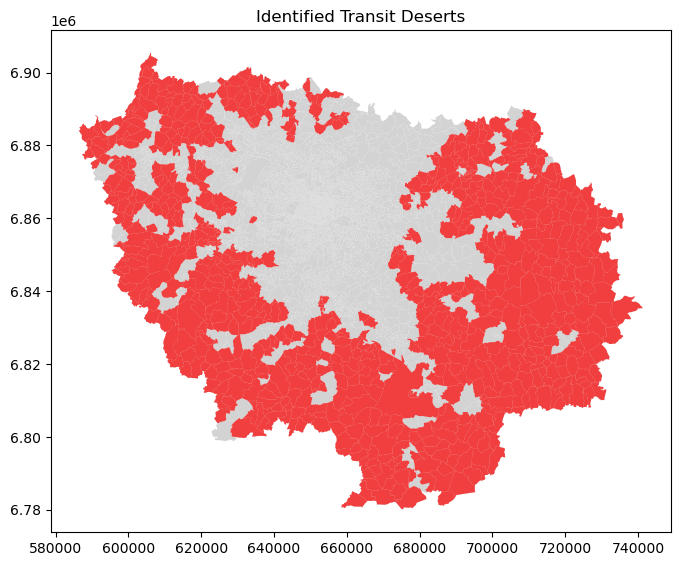

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iris_data.plot(ax=ax, color="lightgray", linewidth=0)
transit_deserts.plot(ax=ax, color="red", alpha=0.7)
plt.title("Identified Transit Deserts")
plt.show()

### Choropleths

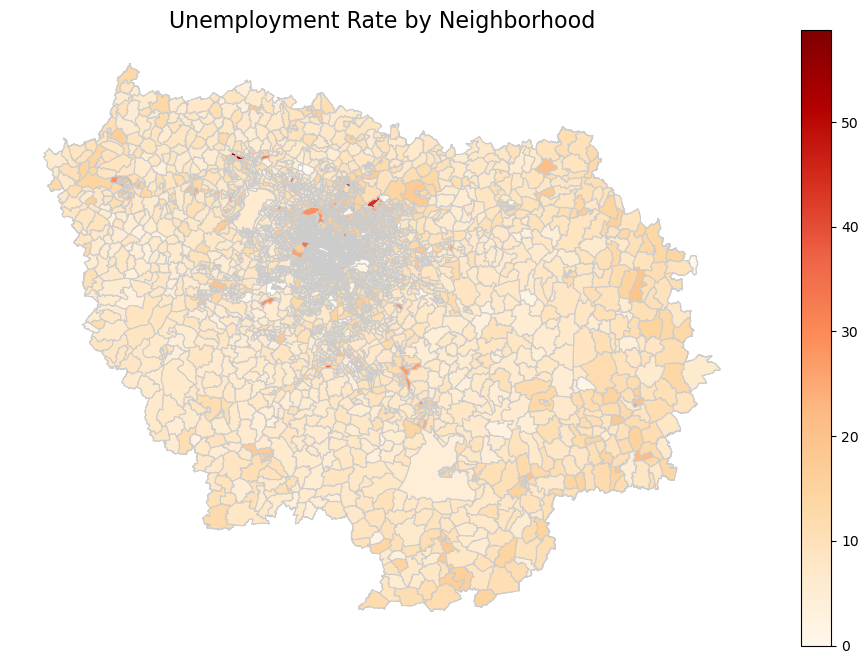

In [36]:
# unemploymenmt
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

iris_data.plot(
    column="unemployment_rate",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Unemployment Rate by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()


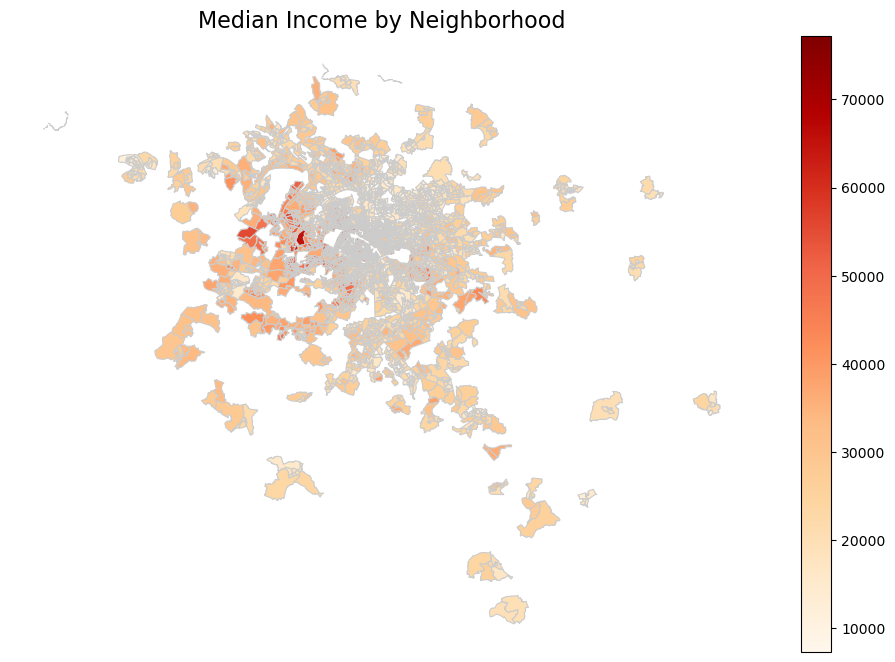

In [38]:
# income
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

iris_data.plot(
    column="median_net_income",          # The variable you want to visualize
    cmap="OrRd",               # Color scheme ("OrRd", "Blues", "Viridis", etc.)
    legend=True,               # Add legend
    linewidth=0.8,
    edgecolor="0.8",
    ax=ax
)

ax.set_title("Median Income by Neighborhood", fontsize=16)
ax.axis("off")
plt.show()


### Plot time vs money

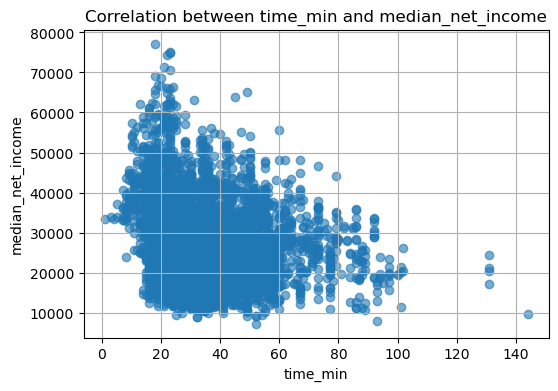

In [19]:
x_col = "time_min"
y_col = "median_net_income"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

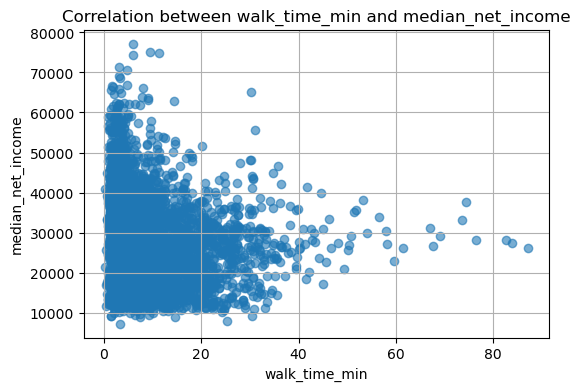

In [20]:
x_col = "walk_time_min"
y_col = "median_net_income"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

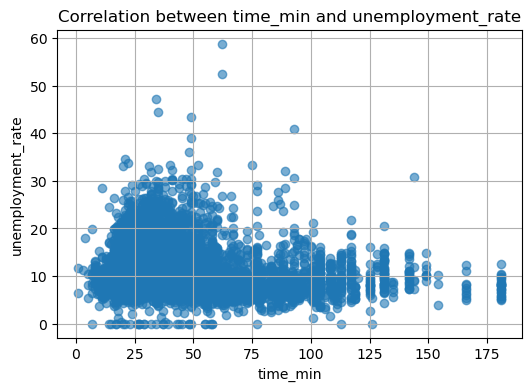

In [21]:
x_col = "time_min"
y_col = "unemployment_rate"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

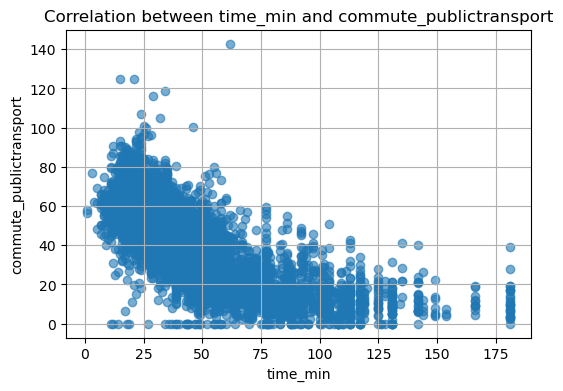

In [22]:
x_col = "time_min"
y_col = "commute_publictransport"

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(iris_data[x_col], iris_data[y_col], alpha=0.6)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"Correlation between {x_col} and {y_col}")
plt.grid(True)
plt.show()

### Neighboring transit deserts

In [51]:
# make a copy to be safe
iris = iris_data.copy()

# define threshold (you can adjust)
max_dist = 1000     # meters
max_walk_time = 10 # minutes

# create boolean column
iris['is_transit_desert'] = (
    (iris['station_count'] == 0) |
    (iris['dist_to_station_m'] > max_dist) |
    (iris['walk_time_min'] > max_walk_time)
)


In [52]:
iris['is_transit_desert'].value_counts()

is_transit_desert
True     4637
False     776
Name: count, dtype: int64

In [57]:
# Subset to transit deserts
deserts = iris[iris['is_transit_desert']]

# Spatial join: find polygons that touch each other
neighbors = gpd.sjoin(deserts, deserts, how='inner', predicate='touches')

# Detect which column names exist
possible_left = [c for c in ['index_left', 'left_index'] if c in neighbors.columns]
possible_right = [c for c in ['index_right', 'right_index'] if c in neighbors.columns]

# If none of the above exist, it’s the old convention where the index is preserved
if not possible_left or not possible_right:
    # old versions keep the left geometry index as the DataFrame index
    neighbors = neighbors.reset_index()
    left_col = 'index'
    right_col = 'index_right' if 'index_right' in neighbors.columns else 'index_2'
else:
    left_col = possible_left[0]
    right_col = possible_right[0]

# Remove self-joins (same polygon joined to itself)
neighbors = neighbors[neighbors[left_col] != neighbors[right_col]]

# Group neighbors into a dictionary
neighbor_dict = (
    neighbors.groupby(left_col)[right_col]
    .apply(list)
    .to_dict()
)

# Flag polygons that have other desert neighbors (clusters)
iris['desert_cluster'] = iris.index.map(
    lambda i: i in neighbor_dict and len(neighbor_dict[i]) > 0
)

In [58]:
print(neighbors.columns)
print(list(neighbor_dict.items())[:5])


Index(['index', 'INSEE_IRIS_ID_left', 'OBJECTID_left', 'TYP_IRIS_left',
       'IRIS_left', 'NOM_IRIS_left', 'INSEE_COM_ID_left', 'NOM_COM_left',
       'INSEE_ARR_ID_left', 'NOM_ARR_left', 'INSEE_DEP_ID_left',
       'NOM_DEP_left', 'INSEE_REG_left', 'id_gares_left',
       'dist_to_station_m_left', 'walk_time_min_left', 'station_count_left',
       'time_min_left', 'population_left', 'median_net_income_left',
       'median_disposable_income_left', 'unemployment_rate_left',
       'employed_rate_left', 'studying_rate_left', 'retired_rate_left',
       'work_local_left', 'work_diffcommune_samearr_left',
       'work_diffcommune_samedept_left',
       'work_diffcommune_diffdept_sameregion_left', 'work_diffregion_left',
       'work_diffcountry__left', 'commute_notransport_left',
       'commute_walk_left', 'commute_bicycle_left', 'commute_motorcycle_left',
       'commute_vehicle_left', 'commute_publictransport_left', 'geometry',
       'is_transit_desert_left', 'index_right', 'INSEE_I

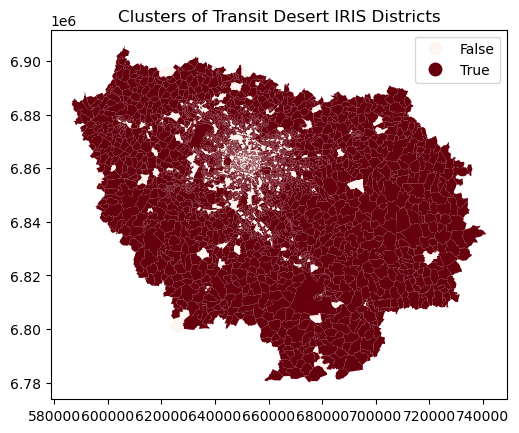

In [59]:
import matplotlib.pyplot as plt

iris.plot(column='desert_cluster', cmap='Reds', legend=True)
plt.title("Clusters of Transit Desert IRIS Districts")
plt.show()
